# Image Morphology in Python

In [2]:
from skimage import morphology
#erosion, dilation, opening, closing, disk 
import numpy as np
from skimage import io
import matplotlib.pyplot as plt


In [3]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

### Exercise 1
We will start by computing a binary image from the lego image:

* Read the image into im_org.
* Convert the image to gray scale.
* Find a threshold using Otsu's method.
* Apply the treshold and generate a binary image bin_img.
* Visualize the image using plot_comparison(im_org, bin_img, 'Binary image')

In [6]:
from skimage import color
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
#import otsus as otsu
from skimage import filters

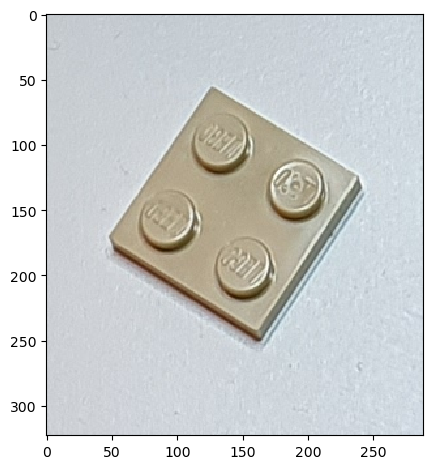

In [4]:
data_dir = './data/'
img_name = 'lego_5.png'
img_org = io.imread(data_dir + img_name)
io.imshow(img_org)

0.9968898039215687


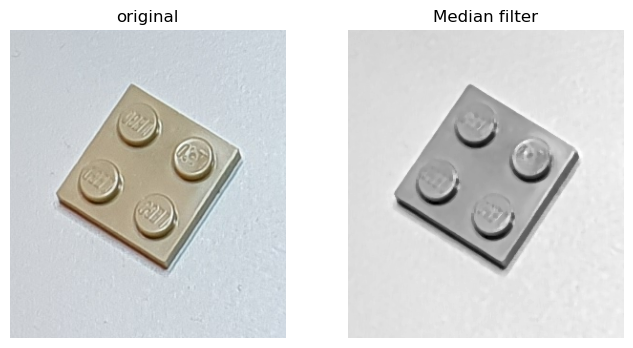

In [50]:
#Convert to grayscale, floating point
img_bw = color.rgb2gray(img_org)
print(np.max(img_bw))

#Apply median filter to remove noise
footprint= np.ones([5,5])
img_med = filters.median(img_bw, footprint)
plot_comparison(img_org, img_med, 'Median filter')

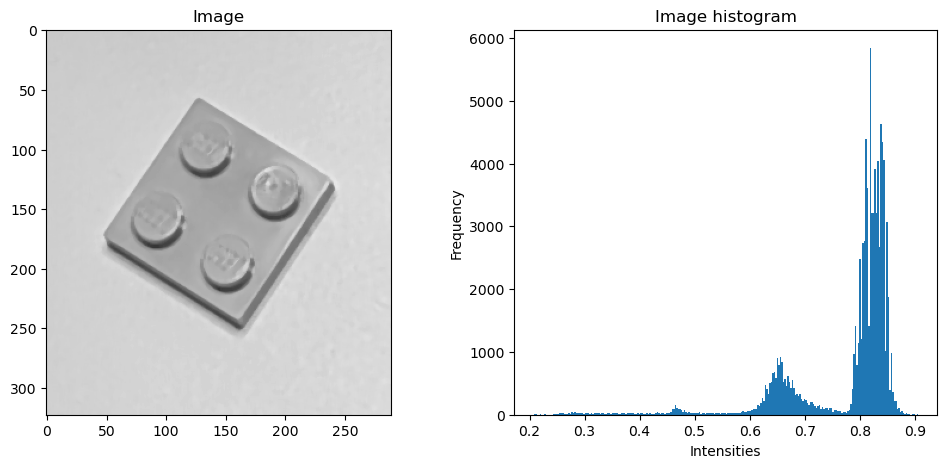

In [54]:
nbins = 256
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (12, 5))
ax[0].imshow(img_med, cmap = 'gray', vmin = 0, vmax = 1)
ax[0].set_title('Image')

ax[1].hist(img_med.ravel(), bins=nbins)
ax[1].set_title('Image histogram')
ax[1].set_xlabel('Intensities')
ax[1].set_ylabel('Frequency')
plt.show()


Otsus threshold:  0.7189031686580882
True


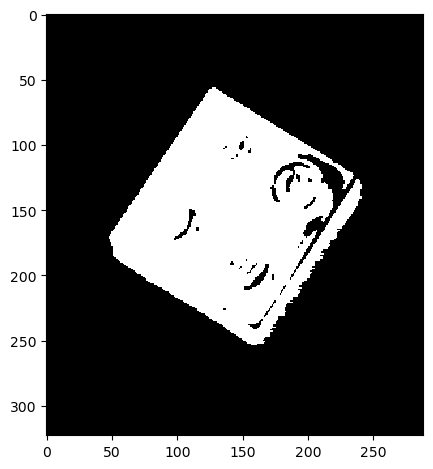

In [112]:
thresh = filters.threshold_otsu(img_med)
print('Otsus threshold: ', thresh)
img_otsu = img_med < thresh
io.imshow(img_otsu)
print(np.max(img_otsu))

In [81]:
#If uint8 was needed, either
img_bw_uint8 = np.round(color.rgb2gray(img_org)*255).astype(np.uint8)
print(np.max(img_bw_uint8))
#or
img_bw = color.rgb2gray(img_org)
img_bw_uint8 = img_as_ubyte(img_bw)
print(np.max(img_bw_uint8))

254
254


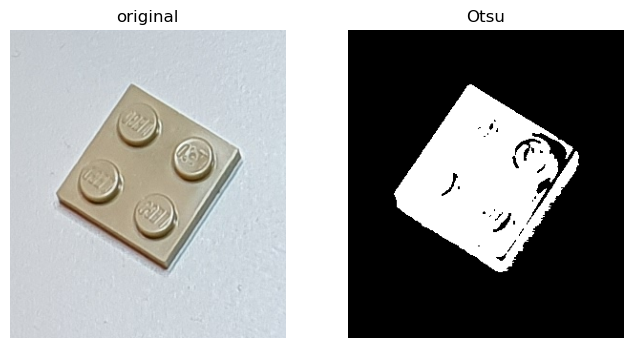

In [82]:
plot_comparison(img_org, img_otsu, 'Otsu')

### Exercise 2
Morpholocial operation erosion can remove small objects, separate objects and make objects smaller. 

In [87]:
footprint = morphology.disk(2)

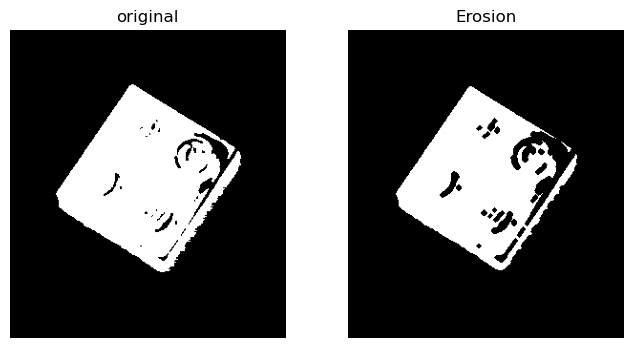

In [88]:
eroded = morphology.erosion(img_otsu, footprint)
plot_comparison(img_otsu, eroded, 'Erosion')

### Exercise 3, dilation
Dilation, makes objects larger, closes holes and connects objects.

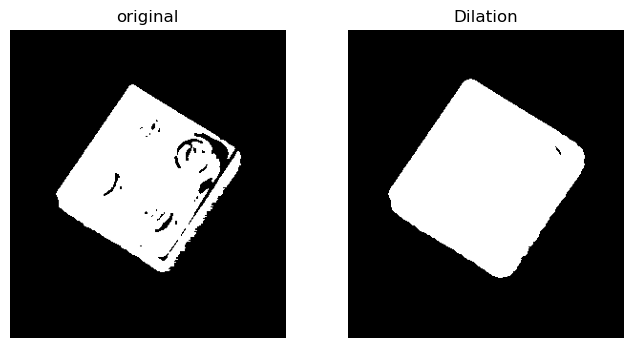

In [91]:
footprint = morphology.disk(6)
dilated = morphology.dilation(img_otsu, footprint)
plot_comparison(img_otsu, dilated, 'Dilation')

### Exercise 4, Opening
Removes small objects, without changing size of remaining objets (Erosion + Dilation)

Otsus threshold:  0.7103125574448529


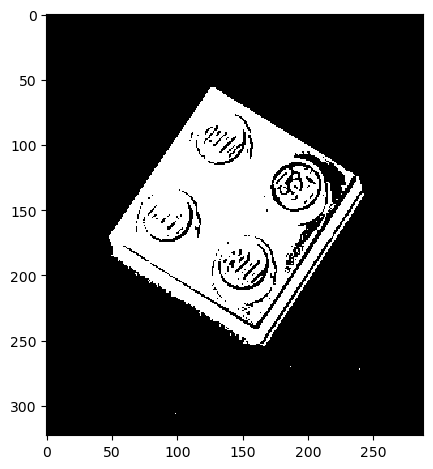

In [115]:
#Loading the image without median filter (some small noise), to see if opening can remove them
thresh = filters.threshold_otsu(img_bw)
print('Otsus threshold: ', thresh)
img_otsu = img_bw < thresh
io.imshow(img_otsu)

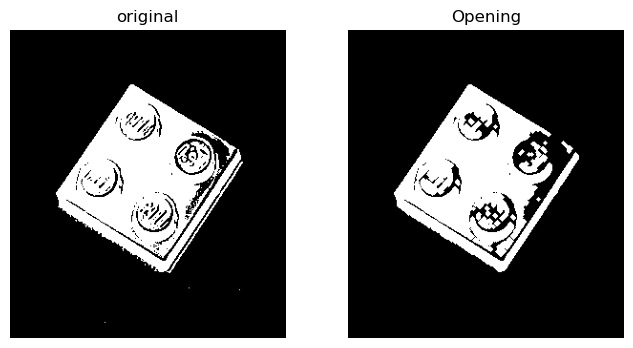

In [105]:
footprint = morphology.disk(2)
opened = morphology.opening(img_otsu, footprint)
plot_comparison(img_otsu, opened, 'Opening')


Opening can remove the noise pixels in lower right corner, but then also removes part of the lego brick, and if disc sizer >1 it opens a "hole" in the brick as seen above

### Closing
closes holes in objects without changing the size of the remaining objects.

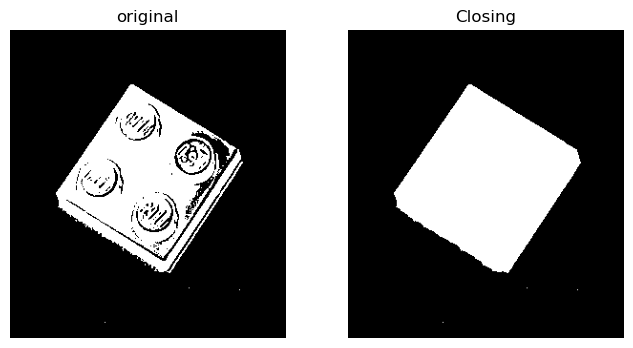

In [99]:
footprint = morphology.disk(8)
closed = morphology.closing(img_otsu, footprint)
plot_comparison(img_otsu, closed, 'Closing')


Sucesfully closes the entire lego brick, but does not remove the noise pixels (they are closed already). However, if applied to the opened image where the noise pixels have been removed... well, then new problem>

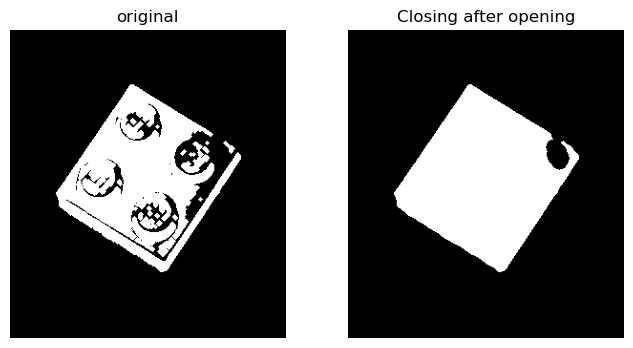

In [106]:
footprint = morphology.disk(8)
closed = morphology.closing(opened, footprint)
plot_comparison(opened, closed, 'Closing after opening')

### Exercise 6: Object outline

In [109]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = morphology.disk(1)
    dilated = morphology.dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

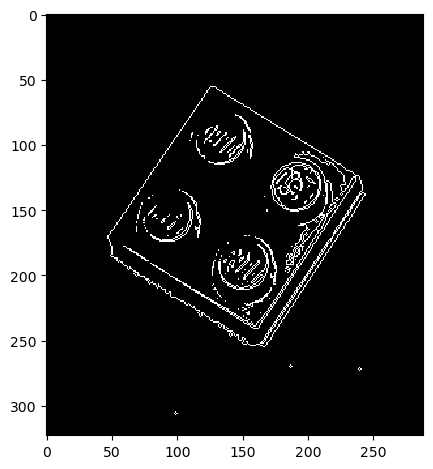

In [116]:
outline_img = compute_outline(img_otsu)
io.imshow(outline_img)

### Exercise 7: Opening, closing, cleaning, outline

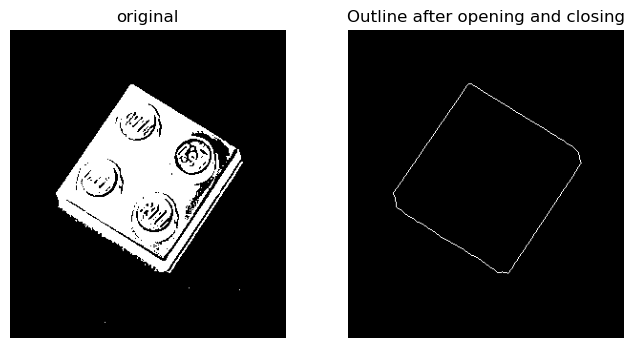

In [118]:
footprint = morphology.disk(1)
img_open = morphology.opening(img_otsu, footprint)
footprint = morphology.disk(15)
img_close = morphology.closing(img_open, footprint)
outline_img = compute_outline(img_close)
plot_comparison(img_otsu, outline_img, 'Outline after opening and closing')

By opening with disc = 1 we remove the noise pixels, but closing with disc = 15 we close all the gaps inside the lego brick, and then our outline returns a clean outline.

### Exercise 8,9 and 10: Morphology on multiple objects

**Exercise 8** 
* reading the lego_7.png image and convert it to gray scale.
* Compute a treshold using Otsu's method and apply it to the image.
* Show the binary image together with the original.
* Compute the outline of the binary image and show it with the binary image.

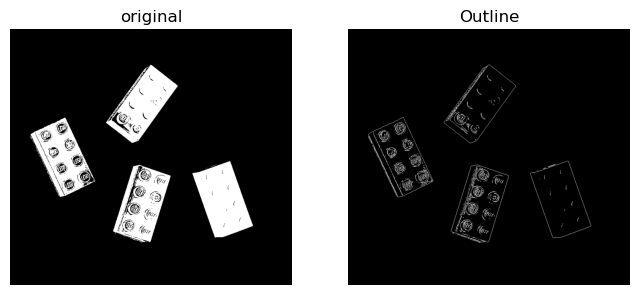

In [129]:
img_name = 'lego_7.png'
img_org = io.imread(data_dir+img_name)
img_bw = color.rgb2gray(img_org)
thres = filters.threshold_otsu(img_bw)
img_otsu = img_bw < thres
img_outline = compute_outline(img_otsu)
plot_comparison(img_otsu, img_outline, 'Outline')

**Exercise 9**

We would like to find a way so only the outline of the entire brick is computed. So for each lego brick there should only be one closed curve.

Try using the closing operations and find out which size of footprint that gives the desired result?

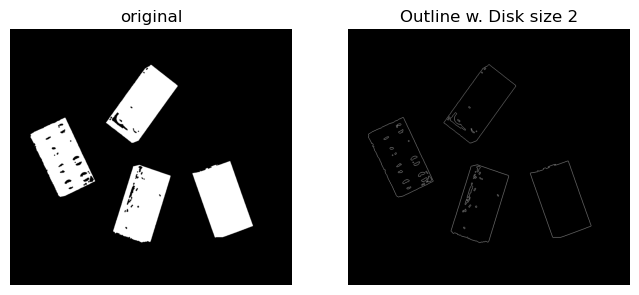

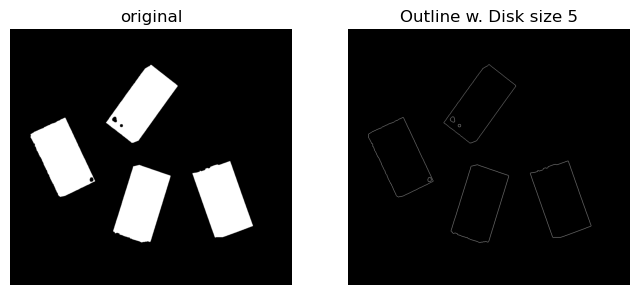

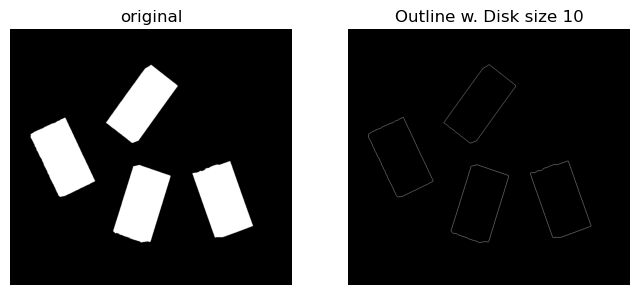

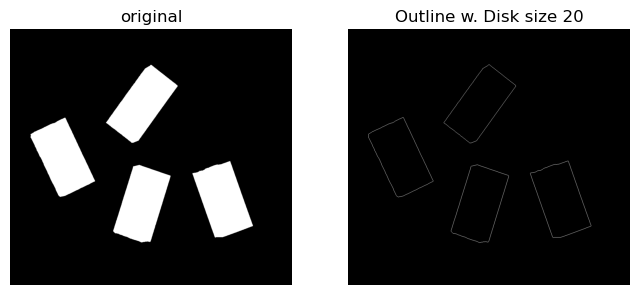

In [130]:
disk_sizes = [2,5,10,20]

for size in disk_sizes:
    footprint = morphology.disk(size)
    img_closing = morphology.closing(img_otsu,footprint)
    img_outline = compute_outline(img_closing)
    plot_comparison(img_closing,img_outline,f'Outline w. Disk size {size}')

A disk size of 10 is required to obtain the intended outline, 20 also works

**Exercise 10**

Try the above on lego_3.png, what do you observe?

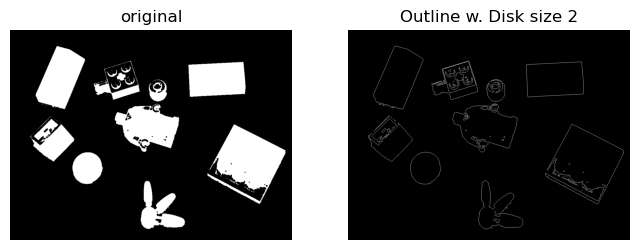

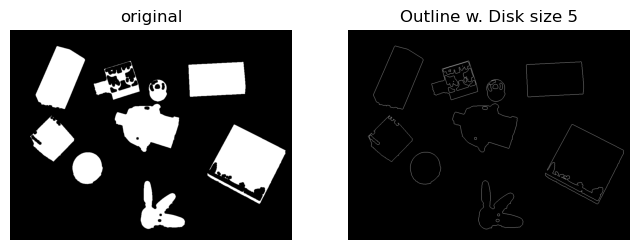

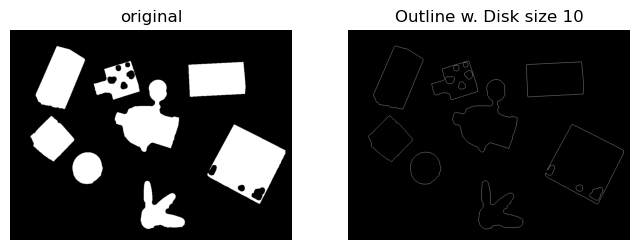

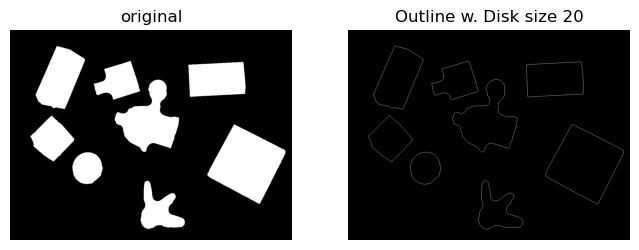

In [131]:
img_name = 'lego_3.png'
img_org = io.imread(data_dir+img_name)
img_bw = color.rgb2gray(img_org)
thres = filters.threshold_otsu(img_bw)
img_otsu = img_bw < thres

disk_sizes = [2,5,10,20]

for size in disk_sizes:
    footprint = morphology.disk(size)
    img_closing = morphology.closing(img_otsu,footprint)
    img_outline = compute_outline(img_closing)
    plot_comparison(img_closing,img_outline,f'Outline w. Disk size {size}')

A disk size of 20 is required to sucesfully outline the objects

## Morphology on multiple connected objects

### Exercise 11

Start by:

* reading the lego_9.png image and convert it to gray scale.
* Compute a treshold using Otsu's method and apply it to the image.
* Show the binary image together with the original.
* Compute the outline of the binary image and show it with the binary image.

What do you observe?

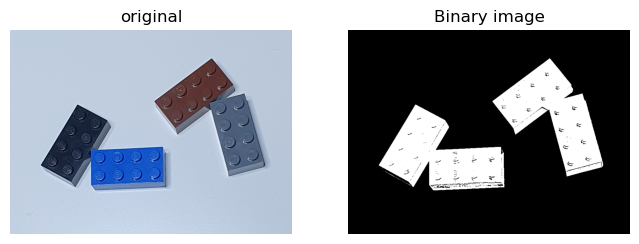

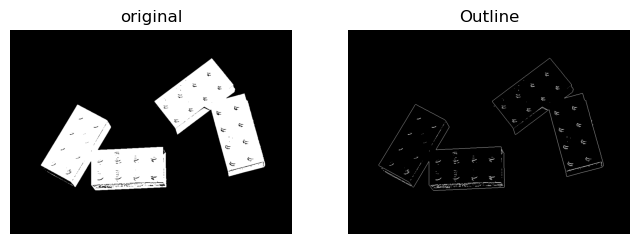

In [134]:
img_org = io.imread(data_dir + 'lego_9.png')
img_bw = color.rgb2gray(img_org)
thresh = filters.threshold_otsu(img_bw)
img_bin = img_bw < thresh
plot_comparison(img_org, img_bin, 'Binary image')
img_outline = compute_outline(img_bin)
plot_comparison(img_bin, img_outline, 'Outline')

Noise from holes inside, as well as problem of connected objects.

### Exercise 12
Remove noise and holes inside objects using closing operations

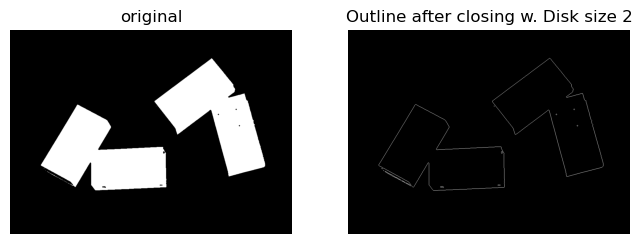

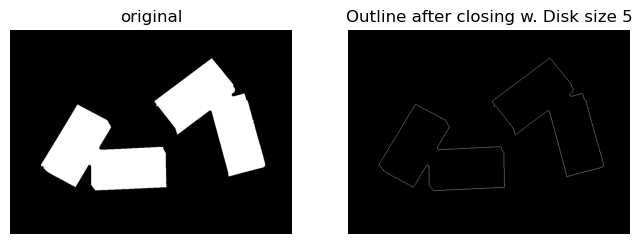

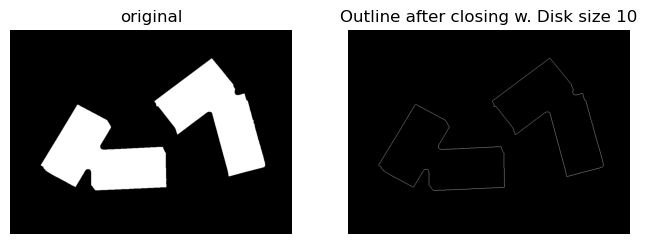

In [139]:
disk_sizes = [2,5,10]

for size in disk_sizes:
    footprint = morphology.disk(size)
    img_closing = morphology.closing(img_bin,footprint)
    img_outline = compute_outline(img_closing)
    plot_comparison(img_closing,img_outline,f'Outline after closing w. Disk size {size}')

Disk size 5 seem to be enough

## Exercise 13

Now we will try to separate the objects. Try using a erosion on the image that you repaired in exercise 12. You should probably use a rather large footprint. How large does it need to be in order to split the objects?

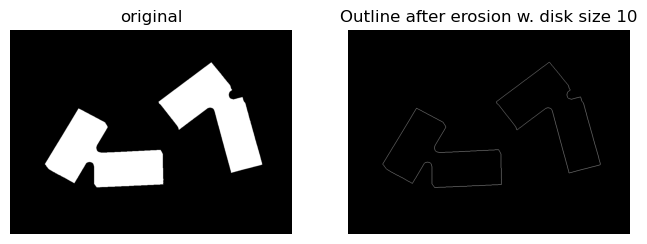

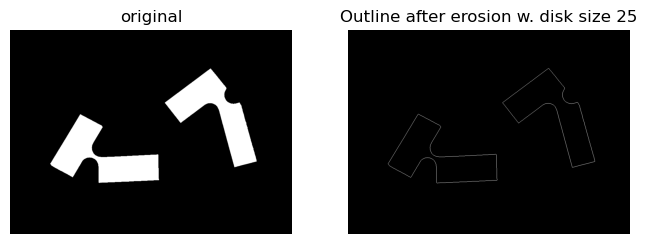

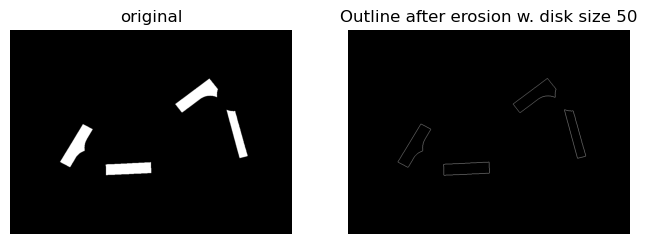

In [147]:
footprint = morphology.disk(5)
img_closed = morphology.closing(img_bin,footprint)

disk_sizes = [10,25,50]

for size in disk_sizes:
    footprint = morphology.disk(size)
    img_erosion = morphology.erosion(img_closed,footprint)
    img_outline = compute_outline(img_erosion)
    plot_comparison(img_erosion,img_outline,f'Outline after erosion w. disk size {size}')

In [153]:
def apply_erosion(img, disk_size):
    footprint = morphology.disk(disk_size)
    img_erosion = morphology.erosion(img,footprint)
    return img_erosion

### Exercise 14
Apply dilation to make the lego bricks larger again. How large footprint do you need?


In [154]:
img_erosion = apply_erosion(img_closed, 50)

In [149]:
def apply_dilation(img, disk_size):
    footprint = morphology.disk(disk_size)
    img_dilated = morphology.dilation(img,footprint)
    return img_dilated

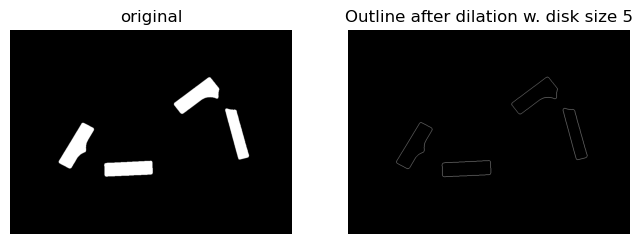

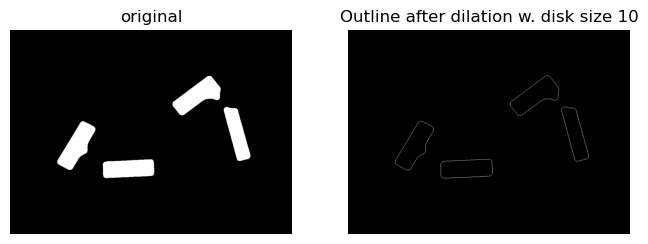

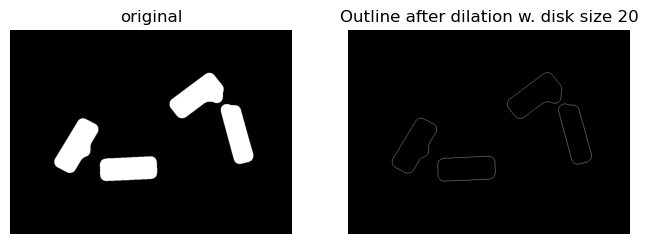

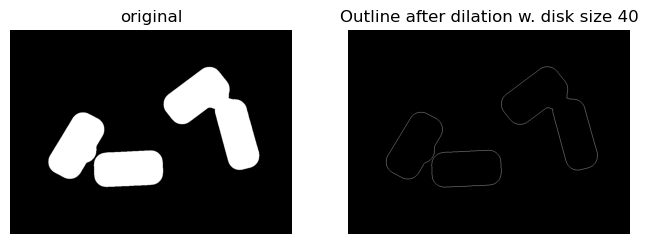

In [156]:
disk_sizes = [5,10,20,40]

for size in disk_sizes:
    img_dilated = apply_dilation(img_erosion, size)
    img_outline = compute_outline(img_dilated)
    plot_comparison(img_dilated,img_outline,f'Outline after dilation w. disk size {size}')

Between 20 and 40 the objects are connected again

## Puzzle piece analysis
Load in puzzle_pieces_.png and convert it to gray scale. Compute a binary image using Otsu's method. Show the binary image together with the original.

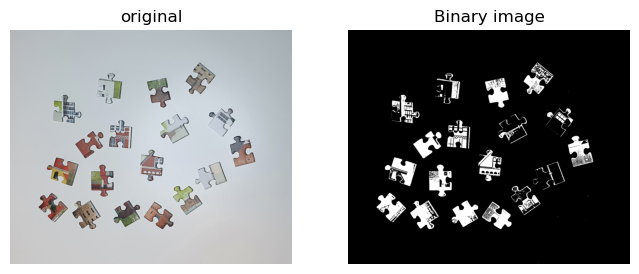

In [157]:
def rgb_to_binary(img: np.ndarray):
    """
    Converts an RGB image to a binary image using Otsu's thresholding
    Returns a binary image as a numpy array (dtype: bool)
    """
    img_gray = color.rgb2gray(img)
    thresh = filters.threshold_otsu(img_gray)
    img_bin = img_gray < thresh
    return img_bin

img_name = 'puzzle_pieces.png'
img_org = io.imread(data_dir + img_name)
img_bin = rgb_to_binary(img_org)
plot_comparison(img_org, img_bin, 'Binary image')

In [158]:
def apply_closing(img, disk_size):
    footprint = morphology.disk(disk_size)
    img_closed = morphology.closing(img,footprint)
    return img_closed

def apply_opening(img, disk_size):
    footprint = morphology.disk(disk_size)
    img_open = morphology.opening(img,footprint)
    return img_open

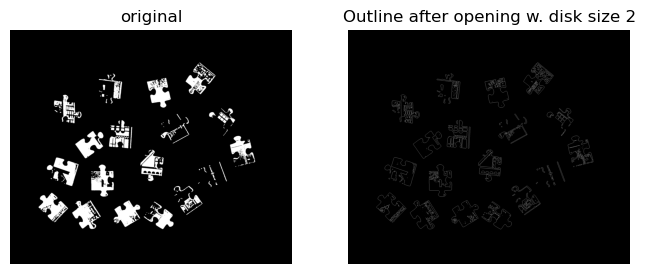

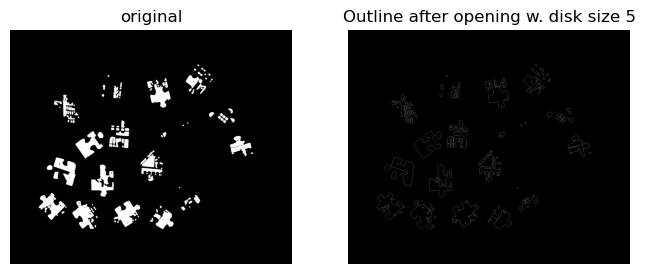

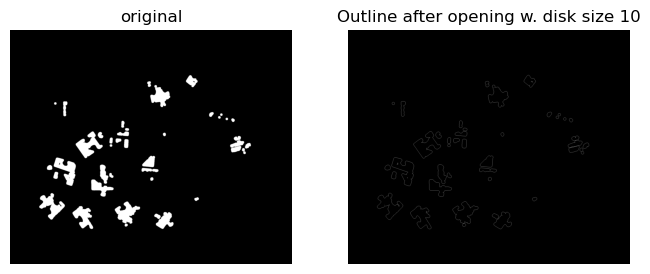

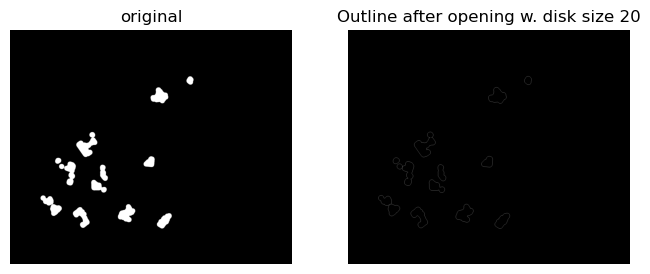

In [159]:
disk_sizes = [2,5,10,20]

for size in disk_sizes:
    img_open = apply_opening(img_bin, size)
    img_outline = compute_outline(img_open)
    plot_comparison(img_open,img_outline,f'Outline after opening w. disk size {size}')

Pooor results..